## Read Metro File and Extract Time Series ##

In [37]:
import datetime as dt
import pandas as pd

In [11]:
all_data = pd.read_csv('/home/sallen/MEOPAR/Metro_Data/UBC Output.xlsx-2023-7-31 15.19.6.csv', 
                       low_memory=False, parse_dates=[11])

In [12]:
all_data.keys()

Index(['LIMS Product', 'Lab Name', 'LIMS Project', 'Project Name', 'Job ID',
       'Lab ID', 'Sample Name', 'Sampling Point', 'Sampling Point Description',
       'Matrix', 'Sample Type', 'Sampled Date', 'Received Date',
       'Extraction Date', 'Analysis Date', 'Report Date', 'Test Type',
       'Method', 'Order Number', 'New Analysis', 'Class', 'Subclass',
       'Analyte', 'LIMS Analysis Code', 'Result', 'DL', 'Units', 'Qualifier',
       'Qualifier Description', 'Sampled By'],
      dtype='object')

In [16]:
all_data = all_data.set_index('Sampled Date')

In [17]:
temp_data = all_data.loc[all_data['LIMS Analysis Code']=='TEMP']

In [26]:
temp_data['Result'] = pd.to_numeric(temp_data.Result)

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


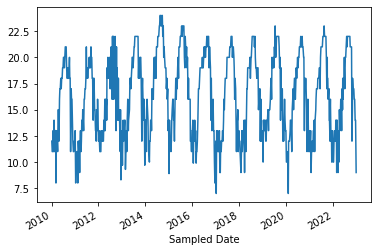

In [28]:
temp_data['Result'].plot();

In [42]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2022, 1, 31)
mask = (temp_data.index > start_date) & (temp_data.index <= end_date)

#Select the sub-DataFrame:

temp_data.loc[mask].Result.mean()


11.25

In [43]:
mask = (temp_data.index.month == 1)

#Select the sub-DataFrame:

temp_data.loc[mask].Result.mean()

11.61864406779661